# Ejercicio 14

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from IPython.display import display, Math, Markdown
from scipy import integrate
from scipy import interpolate

In [10]:
class FourierSeries:
    """
    Clase para calcular y visualizar series de Fourier para funciones
    periódicas por partes.
    """
    def __init__(self, period=2*np.pi, num_terms=100):
        """
        Inicializar la clase de series de Fourier.
        
        Parameters:
        -----------
        period : float
            Período de la función (por defecto 2π)
        num_terms : int
            Número de términos para calcular
        """
        self.period = period
        self.L = period / 2
        self.num_terms = num_terms
        self.a_coeffs = None  # coeficientes coseno
        self.b_coeffs = None  # coeficientes seno
        
    def define_function(self, f_callable):
        """
        Define la función para la cual calcular serie de Fourier.
        
        Parameters:
        -----------
        f_callable : callable
            Función definida por partes a analizar
        """
        self.f_callable = f_callable
        
    def calculate_coefficients(self, show_steps=True, num_coef=3):
        """
        Calcular los coeficientes a_k y b_k de la serie de Fourier.
        
        Parameters:
        -----------
        show_steps : bool
            Si mostrar los pasos del cálculo de las integrales
        num_coef : int
            Número de coeficientes a mostrar en los pasos (default 3)
        """
        self.a_coeffs = []
        self.b_coeffs = []
        
        # Calcular a_0
        def integrand_a0(x):
            return self.f_callable(x)
        
        a0, _ = integrate.quad(integrand_a0, -self.L, self.L)
        a0 = a0 / self.L
        self.a_coeffs.append(a0)
        
        if show_steps:
            display(Markdown("### Cálculo de coeficientes de Fourier"))
            display(Markdown(f"#### Cálculo de $a_0$"))
            display(Math(r"a_0 = \frac{1}{L} \int_{-L}^{L} f(x) \, dx"))
            display(Math(r"a_0 = \frac{1}{" + r"2\pi" + r"} \int_{-" + r"2\pi" + r"}^{" + r"2\pi" + r"} f(x) \, dx"))
            
            # Para nuestra función específica
            display(Markdown("Para nuestra función específica:"))
            display(Math(r"a_0 = \frac{1}{" + r"2\pi" + r"} \left[ \int_{-\pi/2}^{\pi/2} \cos(x) \, dx + \int_{-\pi}^{-\pi/2} 0 \, dx + \int_{\pi/2}^{\pi} 0 \, dx \right]"))
            display(Math(r"a_0 = \frac{1}{" + r"2\pi" + r"} \left[ \left. \sin(x) \right|_{-\pi/2}^{\pi/2} + 0 + 0 \right]"))
            display(Math(r"a_0 = \frac{1}{" + r"2\pi" + r"} \left[ \sin\left(\frac{\pi}{2}\right) - \sin\left(-\frac{\pi}{2}\right) \right]"))
            display(Math(r"a_0 = \frac{1}{" + r"2\pi" + r"} \left[ 1 - (-1) \right] = \frac{2}{" + r"2\pi" + r"} = " + str(a0)))
        
        # Calcular a_k y b_k para k > 0
        for k in range(1, self.num_terms + 1):
            # Calcular a_k: (1/L) * ∫ f(x)*cos(k*π*x/L) dx
            def integrand_ak(x, k=k):
                return self.f_callable(x) * np.cos(k * np.pi * x / self.L)
            
            ak, _ = integrate.quad(integrand_ak, -self.L, self.L)
            ak = ak / self.L
            self.a_coeffs.append(ak)
            
            if show_steps and k <= num_coef:
                display(Markdown(f"#### Cálculo de $a_{k}$"))
                display(Math(r"a_" + str(k) + r" = \frac{1}{L} \int_{-L}^{L} f(x) \cos\left(\frac{" + str(k) + r"\pi x}{L}\right) \, dx"))
                display(Math(r"a_" + str(k) + r" = \frac{1}{" + r"2\pi" + r"} \int_{-" + r"2\pi" + r"}^{" + r"2\pi" + r"} f(x) \cos\left(\frac{" + str(k) + r"x}{" + r"2\pi" + r"}\right) \, dx"))
                
                # Para nuestra función específica
                display(Markdown("Para nuestra función específica:"))
                display(Math(r"a_" + str(k) + r" = \frac{1}{" + r"2\pi" + r"} \int_{-\pi/2}^{\pi/2} \cos(x) \cos\left(" + str(k) + r"x\right) \, dx"))
                display(Math(r"a_" + str(k) + r" = " + str(ak)))
            
            # Calcular b_k: (1/L) * ∫ f(x)*sin(k*π*x/L) dx
            def integrand_bk(x, k=k):
                return self.f_callable(x) * np.sin(k * np.pi * x / self.L)
            
            bk, _ = integrate.quad(integrand_bk, -self.L, self.L)
            bk = bk / self.L
            self.b_coeffs.append(bk)
            
            if show_steps and k <= num_coef:
                display(Markdown(f"#### Cálculo de $b_{k}$"))
                display(Math(r"b_" + str(k) + r" = \frac{1}{L} \int_{-L}^{L} f(x) \sin\left(\frac{" + str(k) + r"\pi x}{L}\right) \, dx"))
                display(Math(r"b_" + str(k) + r" = \frac{1}{" + r"2\pi" + r"} \int_{-" + r"2\pi" + r"}^{" + r"2\pi" + r"} f(x) \sin\left(" + str(k) + r"x\right) \, dx"))
                
                # Para nuestra función específica
                display(Markdown("Para nuestra función específica:"))
                display(Math(r"b_" + str(k) + r" = \frac{1}{" + r"2\pi" + r"} \int_{-\pi/2}^{\pi/2} \cos(x) \sin\left(" + str(k) + r"x\right) \, dx"))
                display(Math(r"b_" + str(k) + r" = " + str(bk)))
    def get_approximation_function(self, terms=None):
        """
        Obtener una función que aproxima la serie de Fourier.
        
        Parameters:
        -----------
        terms : int
            Número de términos a incluir en la aproximación
            
        Returns:
        --------
        callable: Función de aproximación
        """
        if self.a_coeffs is None or self.b_coeffs is None:
            self.calculate_coefficients(show_steps=False)
            
        if terms is None:
            terms = self.num_terms
        else:
            terms = min(terms, self.num_terms)
            
        def approximation(x):
            # Asegurarse que x está en [-L, L]
            x = ((x + self.L) % (2*self.L)) - self.L
            
            # Inicializar con el término a_0/2
            result = self.a_coeffs[0] / 2
            
            # Sumar los términos a_k*cos(k*π*x/L) + b_k*sin(k*π*x/L)
            for k in range(1, terms + 1):
                result += self.a_coeffs[k] * np.cos(k * np.pi * x / self.L)
                result += self.b_coeffs[k-1] * np.sin(k * np.pi * x / self.L)
                
            return result
        
        return approximation
    
    def display_coefficients_table(self, num_to_show=10):
        """
        Mostrar tabla de coeficientes de Fourier.
        """
        if self.a_coeffs is None or self.b_coeffs is None:
            self.calculate_coefficients(show_steps=False)
            
        n_to_show = min(num_to_show, self.num_terms)
        
        data = {
            'n': [0] + list(range(1, n_to_show + 1)),
            'a_n': self.a_coeffs[:n_to_show + 1],
            'b_n': [0] + self.b_coeffs[:n_to_show]  # b_0 no existe
        }
        
        df = pd.DataFrame(data)
        display(df)
        return df
    
    def plot_function_and_approximations(self, x_range=None, num_points=1000, term_list=None):
        """
        Graficar la función original y sus aproximaciones de Fourier.
        
        Parameters:
        -----------
        x_range : tuple
            Rango (min_x, max_x) para graficar
        num_points : int
            Número de puntos para evaluar
        term_list : list
            Lista de números de términos para aproximaciones
        """
        if x_range is None:
            x_range = (-self.L*1.5, self.L*1.5)
            
        if term_list is None:
            term_list = [1, 5, 10, 20, 50]
            
        x = np.linspace(x_range[0], x_range[1], num_points)
        y_original = np.array([self.f_callable(xi) for xi in x])
        
        plt.figure(figsize=(12, 8))
        
        # Graficar función original
        plt.plot(x, y_original, 'k-', label='f(x) original', linewidth=2)
        
        # Graficar aproximaciones
        for terms in term_list:
            if terms <= self.num_terms:  # Verificar que el número de términos no exceda self.num_terms
                approx_func = self.get_approximation_function(terms)
                y_approx = np.array([approx_func(xi) for xi in x])
                plt.plot(x, y_approx, label=f'Fourier ({terms} términos)')
            else:
                print(f"Advertencia: El número de términos {terms} excede el máximo permitido ({self.num_terms}).")
        
        # Marcar límites del período
        plt.axvline(-self.L, color='gray', linestyle='--', alpha=0.7)
        plt.axvline(self.L, color='gray', linestyle='--', alpha=0.7)
        
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.title("Serie de Fourier para f(x)")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        
        return plt.gcf()
    
    def calculate_error(self, x_points=None, term_list=None, tolerance=1e-10):
        """
        Calcular error entre aproximación y función real.
        
        Parameters:
        -----------
        x_points : list or array
            Puntos donde calcular el error
        term_list : list
            Lista de números de términos para evaluación
        tolerance : float
            Tolerancia para considerar un error como máximo (relativo al máximo absoluto)
            
        Returns:
        --------
        DataFrame con información de error y puntos donde ocurre el error máximo
        """
        if x_points is None:
            # Aumentar densidad de puntos cerca de las discontinuidades
            x1 = np.linspace(-self.L, -np.pi/2 - 0.01, 100)
            x2 = np.linspace(-np.pi/2 - 0.01, -np.pi/2 + 0.01, 200)  # Más puntos cerca de -π/2
            x3 = np.linspace(-np.pi/2 + 0.01, np.pi/2 - 0.01, 100)
            x4 = np.linspace(np.pi/2 - 0.01, np.pi/2 + 0.01, 200)    # Más puntos cerca de π/2
            x5 = np.linspace(np.pi/2 + 0.01, self.L, 100)
            x_points = np.concatenate((x1, x2, x3, x4, x5))
            
        if term_list is None:
            term_list = [1, 5, 10, 20, 50]
            
        # Calcular valores reales
        actual_values = np.array([self.f_callable(x) for x in x_points])
        
        # Para cada número de términos
        results = []
        
        for terms in term_list:
            if terms <= self.num_terms:
                approx_func = self.get_approximation_function(terms)
                approx_values = np.array([approx_func(x) for x in x_points])
                abs_error = np.abs(actual_values - approx_values)
                mse = np.mean(abs_error**2)
                max_error = np.max(abs_error)
                
                # Encontrar todos los puntos donde el error está cerca del máximo
                max_indices = np.where(abs_error >= max_error - tolerance)[0]
                max_points = x_points[max_indices]
                
                # Crear cadenas de notación π para cada punto
                max_point_labels = [self._format_point_as_pi(p) for p in max_points]
                
                # Para mostrar como una lista separada por comas
                if len(max_points) > 1:
                    max_point_str = ", ".join([f"{p:.6f}" for p in max_points])
                    max_point_label_str = ", ".join(max_point_labels)
                else:
                    max_point_str = f"{max_points[0]:.6f}"
                    max_point_label_str = max_point_labels[0]
                
                results.append({
                    'Términos': terms,
                    'Error cuadrático medio': mse,
                    'Error máximo': max_error,
                    'Puntos de error máximo': max_point_str,
                    'Puntos (notación π)': max_point_label_str
                })
        
        # Crear DataFrame
        df = pd.DataFrame(results)
        return df

    def _format_point_as_pi(self, point, close_tolerance = 0.01 ):
        """
        Convierte un punto numérico en notación π para mejor visualización.
        
        Parameters:
        -----------
        point : float
            Valor numérico a convertir
        close_tolerance : float

            
        Returns:
        --------
        str : Representación simbólica simplificada en términos de π
        """
        
        # Valores exactos comunes (usamos tolerancia más amplia para redondear)
        if abs(point - np.pi/2) < close_tolerance:
            return "π/2"
        elif abs(point + np.pi/2) < close_tolerance:
            return "-π/2"
        elif abs(point - np.pi) < close_tolerance:
            return "π"
        elif abs(point + np.pi) < close_tolerance:
            return "-π"
        elif abs(point) < close_tolerance:
            return "0"
        elif abs(point - np.pi/4) < close_tolerance:
            return "π/4"
        elif abs(point + np.pi/4) < close_tolerance:
            return "-π/4"
        
        # Para otros valores, mostrar en términos de π redondeado a 2 decimales
        pi_fraction = point / np.pi
        return f"{pi_fraction:.2f}π"

    def visualize_convergence(self, x_point=0, max_terms=None):
        """
        Visualizar cómo converge la serie de Fourier en un punto específico.
        
        Parameters:
        -----------
        x_point : float
            Punto donde verificar la convergencia
        max_terms : int
            Número máximo de términos a incluir
        """
        if max_terms is None:
            max_terms = self.num_terms
            
        # Calcular valor real
        actual = self.f_callable(x_point)
        
        # Calcular aproximaciones con términos crecientes
        terms_range = list(range(1, max_terms + 1))
        approximations = []
        errors = []
        
        for n in terms_range:
            approx_func = self.get_approximation_function(n)
            approx = approx_func(x_point)
            approximations.append(approx)
            errors.append(abs(actual - approx))
        
        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Gráfico de valores de aproximación
        ax1.plot(terms_range, approximations, 'bo-')
        ax1.axhline(actual, color='r', linestyle='--', label=f'Valor exacto: {actual:.6f}')
        ax1.set_title(f'Convergencia en x = {x_point}')
        ax1.set_xlabel('Número de términos')
        ax1.set_ylabel('Valor de la aproximación')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Gráfico de errores
        ax2.semilogy(terms_range, errors, 'ro-')
        ax2.set_title(f'Error de aproximación en x = {x_point}')
        ax2.set_xlabel('Número de términos')
        ax2.set_ylabel('Error (escala logarítmica)')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig

    def visualize_max_error_points(self, term_list=None):
        """
        Visualizar los puntos donde ocurre el error máximo para diferentes términos.
        
        Parameters:
        -----------
        term_list : list
            Lista de términos a evaluar
            
        Returns:
        --------
        Figura matplotlib
        """
        if term_list is None:
            term_list = [1, 5, 10, 20, 50]
            
        # Calcular puntos de error máximo con mayor precisión
        # Usar más puntos cerca de las discontinuidades
        x1 = np.linspace(-self.L, -np.pi/2 - 0.01, 100)
        x2 = np.linspace(-np.pi/2 - 0.01, -np.pi/2 + 0.01, 200)  # Más puntos cerca de -π/2
        x3 = np.linspace(-np.pi/2 + 0.01, np.pi/2 - 0.01, 100)
        x4 = np.linspace(np.pi/2 - 0.01, np.pi/2 + 0.01, 200)    # Más puntos cerca de π/2
        x5 = np.linspace(np.pi/2 + 0.01, self.L, 100)
        x_points = np.concatenate((x1, x2, x3, x4, x5))
        
        error_df = self.calculate_error(x_points, term_list, tolerance=1e-10)
        
        # Configurar gráfico
        fig, ax = plt.subplots(figsize=(14, 9))
        
        # Graficar función original
        x = np.linspace(-self.L*1.5, self.L*1.5, 1000)
        y_original = np.array([self.f_callable(xi) for xi in x])
        ax.plot(x, y_original, 'k-', label='f(x) original', linewidth=2)
        
        # Graficar aproximaciones y marcar puntos de error máximo
        colors = plt.cm.tab10(np.linspace(0, 1, len(term_list)))
        
        for i, terms in enumerate(term_list):
            if terms <= self.num_terms:
                approx_func = self.get_approximation_function(terms)
                y_approx = np.array([approx_func(xi) for xi in x])
                ax.plot(x, y_approx, color=colors[i], label=f'Fourier ({terms} términos)')
                
                # Extraer todos los puntos máximos del string (formato "x1, x2, x3...")
                max_error_points_str = error_df.loc[error_df['Términos'] == terms, 'Puntos de error máximo'].values[0]
                max_error_points = [float(p) for p in max_error_points_str.split(", ")]
                
                # Marcar cada punto de error máximo
                for point in max_error_points:
                    max_error_value = approx_func(point)
                    ax.plot(point, max_error_value, 'o', color=colors[i], markersize=8)
        
        # Marcar límites del período
        ax.axvline(-self.L, color='gray', linestyle='--', alpha=0.7)
        ax.axvline(self.L, color='gray', linestyle='--', alpha=0.7)
        
        # Añadir anotación para los puntos de discontinuidad
        ax.axvline(-np.pi/2, color='red', linestyle=':', alpha=0.7, 
                   label='Puntos de discontinuidad')
        ax.axvline(np.pi/2, color='red', linestyle=':', alpha=0.7)
        
        # Añadir etiquetas en los ejes para los puntos de discontinuidad
        ax.text(-np.pi/2, -0.1, r'$-\pi/2$', ha='center', color='red')
        ax.text(np.pi/2, -0.1, r'$\pi/2$', ha='center', color='red')
        
        ax.grid(True, alpha=0.3)
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=min(4, len(term_list)))
        ax.set_title("Serie de Fourier y puntos de error máximo")
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")
        
        return fig

    def display_fourier_series(self, terms=None):
        """
        Mostrar la representación simbólica de la serie de Fourier.
        
        Parameters:
        -----------
        terms : int
            Número de términos a incluir en la representación (default: todos los términos disponibles)
            
        Returns:
        --------
        sympy.Expr: Representación simbólica de la serie de Fourier
        """
        if self.a_coeffs is None or self.b_coeffs is None:
            self.calculate_coefficients(show_steps=False)
        
        if terms is None:
            terms = self.num_terms
        else:
            terms = min(terms, self.num_terms)
        
        # Definir variable simbólica
        x = sp.symbols('x')
        
        # Construir la serie de Fourier
        fourier_series = self.a_coeffs[0] / 2  # Término constante a_0 / 2
        for k in range(1, terms + 1):
            fourier_series += self.a_coeffs[k] * sp.cos(k * sp.pi * x / self.L)
            fourier_series += self.b_coeffs[k - 1] * sp.sin(k * sp.pi * x / self.L)
        
        # Mostrar la serie
        display(sp.Eq(sp.Function('f')(x), fourier_series))
        return fourier_series


,n,a_n,b_n
0,0,0.0,0.000000e+00
1,1,0.0,1.273240e+00
2,2,0.0,1.089953e-16
3,3,0.0,4.244132e-01
4,4,0.0,1.005109e-16
5,5,0.0,2.546479e-01
6,6,0.0,3.517748e-16
7,7,0.0,1.818914e-01
8,8,0.0,-5.438186e-16
9,9,0.0,1.414711e-01


Eq(f(x), 1.27323954473516*sin(0.318309886183791*pi*x) + 1.08995295022091e-16*sin(0.636619772367581*pi*x) + 0.424413181578388*sin(0.954929658551372*pi*x) + 1.00510894338722e-16*sin(1.27323954473516*pi*x) + 0.254647908947032*sin(1.59154943091895*pi*x) + 3.51774798729023e-16*sin(1.90985931710274*pi*x) + 0.181891363533594*sin(2.22816920328654*pi*x) - 5.43818605928925e-16*sin(2.54647908947033*pi*x) + 0.141471060526129*sin(2.86478897565412*pi*x) - 1.66482934915827e-17*sin(3.18309886183791*pi*x) + 0.115749049521378*sin(3.5014087480217*pi*x) + 2.76835013254613e-16*sin(3.81971863420549*pi*x) + 0.0979415034411665*sin(4.13802852038928*pi*x) + 2.42995599264058e-16*sin(4.45633840657307*pi*x) + 0.0848826363156774*sin(4.77464829275686*pi*x))

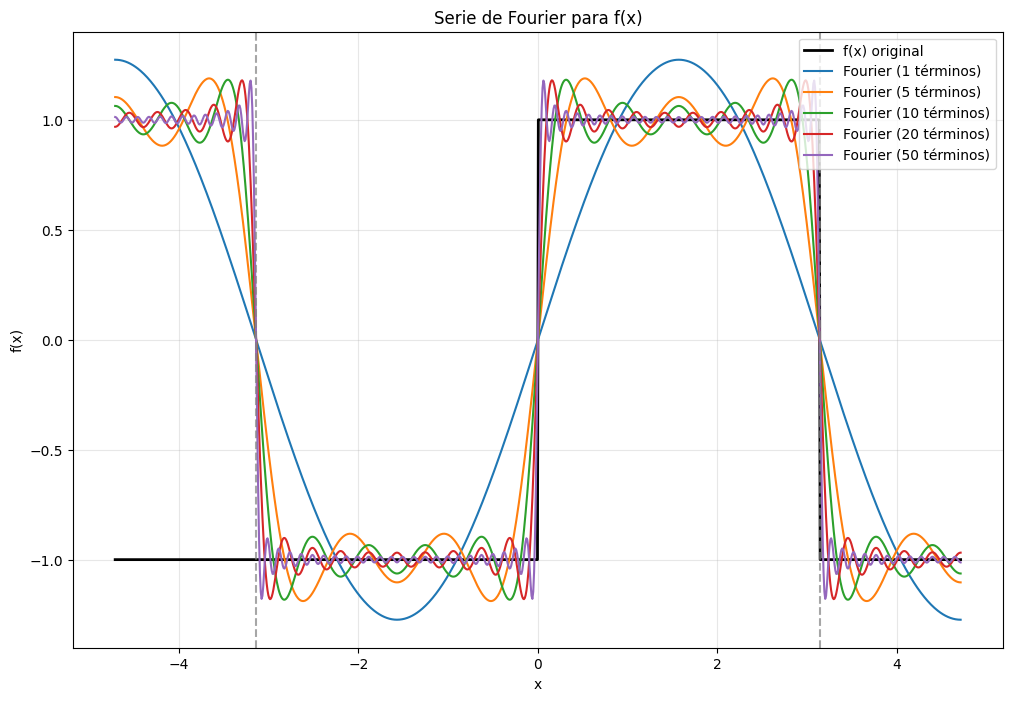

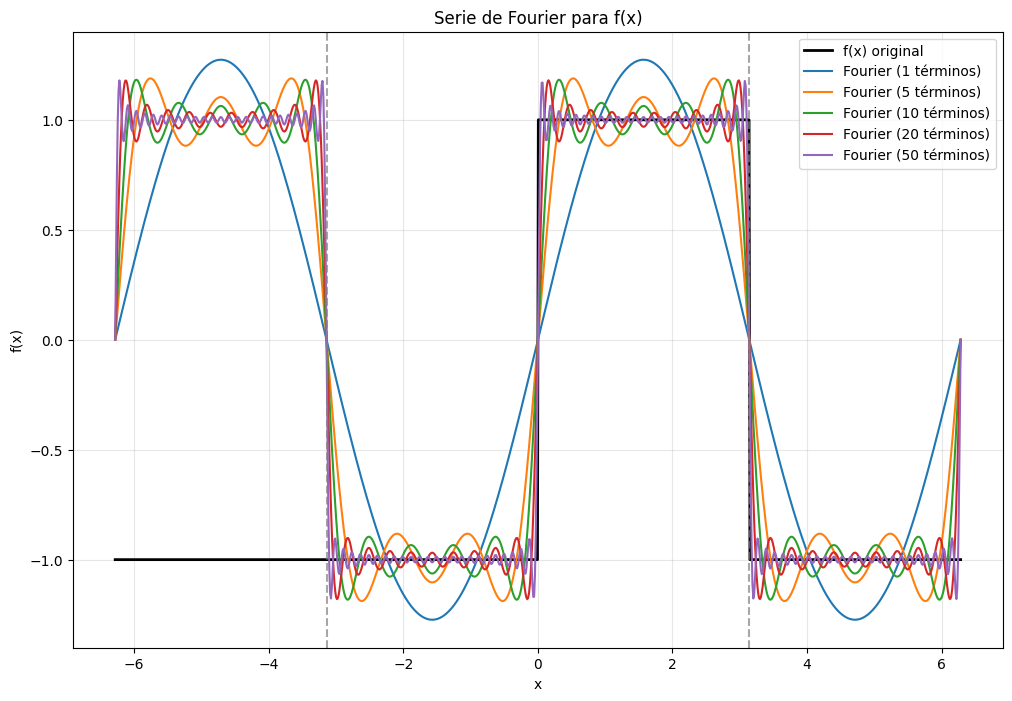

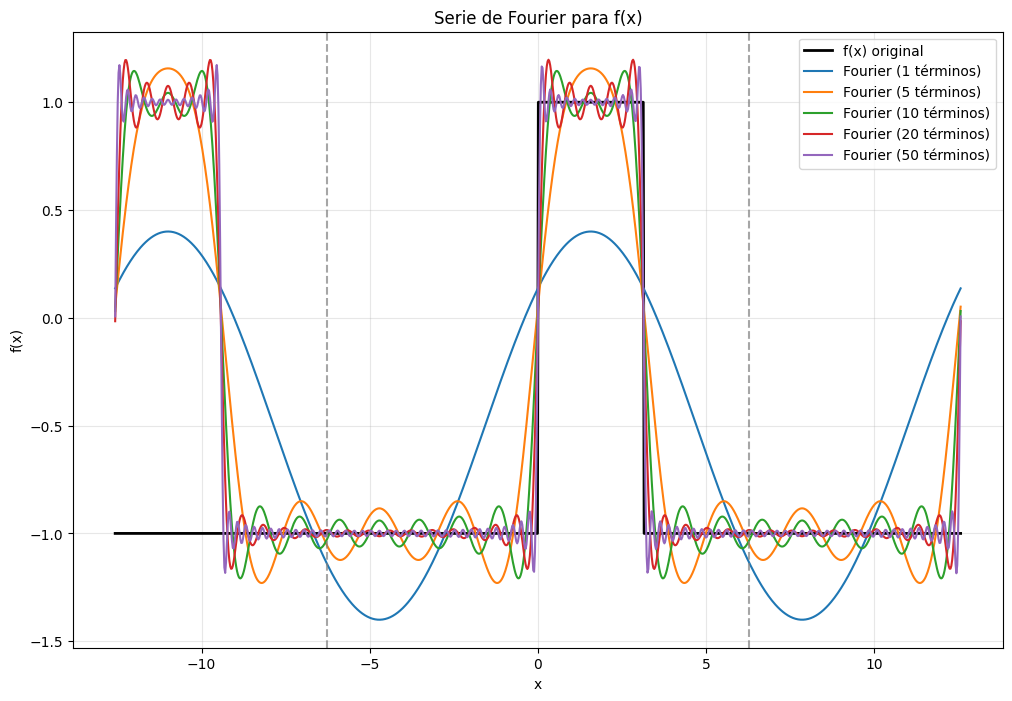

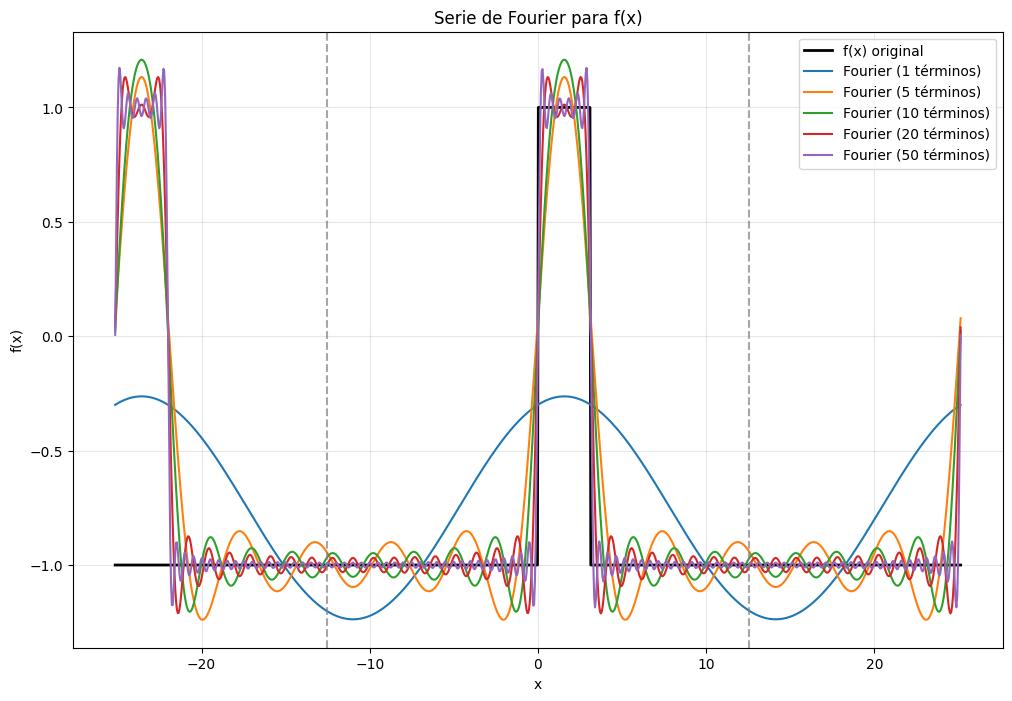

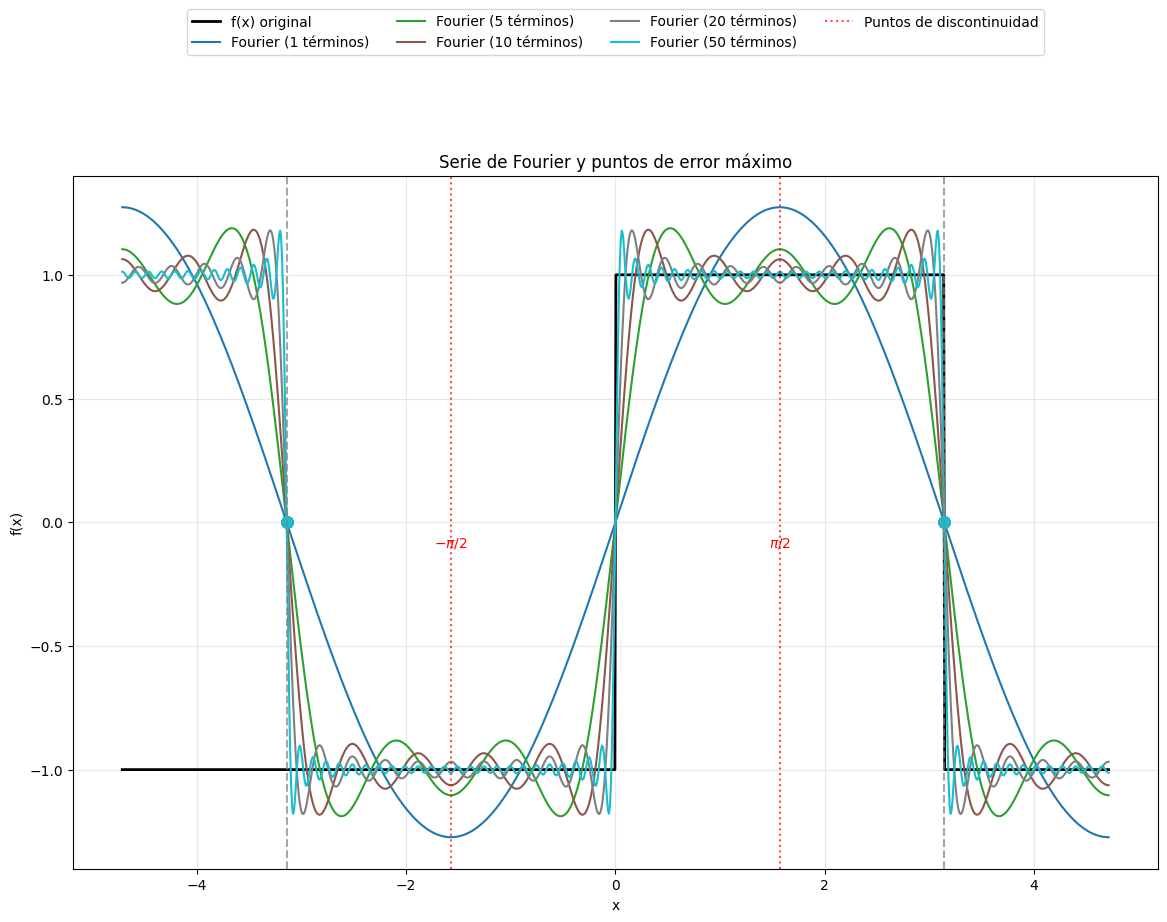

In [12]:
import os

# Definimos nuestra función f(x)
def f(x):
    if 0 <= x <= np.pi:
        return 1
    else:
        return -1

# Creamos una instancia de la serie de Fourier
# Crear un archivo markdown para guardar el output
output_file = "fourier_analysis_output.md"
if os.path.exists(output_file):
    os.remove(output_file)

def save_to_markdown(content):
    with open(output_file, "a") as f:
        f.write(content + "\n\n")

# Crear una instancia de la serie de Fourier
fourier = FourierSeries(period=2*np.pi, num_terms=50)
fourier.define_function(f)

# Calculamos los coeficientes mostrando los pasos
fourier.calculate_coefficients(show_steps=False, num_coef=15)

# Guardamos la tabla de coeficientes en el archivo markdown
save_to_markdown("### Tabla de coeficientes de Fourier")
coefficients_table = fourier.display_coefficients_table(num_to_show=15)
save_to_markdown(coefficients_table.to_markdown(index=False))

# Guardamos la representación simbólica de la serie de Fourier
save_to_markdown("### Representación simbólica de la serie de Fourier")
fourier_series = fourier.display_fourier_series(terms=15)
save_to_markdown(str(fourier_series))

# Graficamos la función y sus aproximaciones y guardamos la figura
save_to_markdown("### Gráfica de la función y sus aproximaciones de Fourier")
fig = fourier.plot_function_and_approximations()
fig.savefig("fourier_approximations.png")
save_to_markdown("![Gráfica de la función y sus aproximaciones](fourier_approximations.png)")

# Comparamos diferentes valores de L (período) y su impacto
save_to_markdown("### Efecto de cambiar el período L")
for L in [np.pi, 2*np.pi, 4*np.pi]:
    fourier_L = FourierSeries(period=2*L, num_terms=50)
    fourier_L.define_function(f)
    fourier_L.calculate_coefficients(show_steps=False, num_coef=15)
    save_to_markdown(f"#### Período = {sp.latex(sp.Rational(L / np.pi))}π")
    fig_L = fourier_L.plot_function_and_approximations(x_range=(-2*L, 2*L))
    fig_L.savefig(f"fourier_approximations_L_{int(L)}.png")
    save_to_markdown(f"![Gráfica para L={L}](fourier_approximations_L_{int(L)}.png)")

# Analizamos los puntos de error máximo y guardamos el DataFrame
save_to_markdown("### Análisis detallado de errores máximos")
error_df_detailed = fourier.calculate_error()
save_to_markdown(error_df_detailed.to_markdown(index=False))

# Visualizamos dónde ocurren los errores máximos y guardamos la figura
save_to_markdown("### Visualización de puntos de error máximo")
fig_error = fourier.visualize_max_error_points()
fig_error.savefig("fourier_max_error_points.png")
save_to_markdown("![Visualización de puntos de error máximo](fourier_max_error_points.png)")

# Ejercicio 4 PC2

In [23]:
class CubicSpline:
    """
    Clase para interpolar puntos utilizando splines cúbicos.
    """
    def __init__(self, x=None, y=None, boundary_type='natural'):
        """
        Inicializar la clase de interpolación con splines cúbicos.
        
        Parameters:
        -----------
        x : array_like
            Valores x de los puntos a interpolar
        y : array_like
            Valores y de los puntos a interpolar
        boundary_type : str
            Tipo de condición de frontera ('natural', 'clamped', 'not-a-knot')
        """
        self.x = x
        self.y = y
        self.boundary_type = boundary_type
        self.coefficients = None
        self.spline_func = None
        
    def set_points(self, x, y):
        """
        Definir los puntos para la interpolación.
        
        Parameters:
        -----------
        x : array_like
            Valores x de los puntos a interpolar
        y : array_like
            Valores y de los puntos a interpolar
        """
        self.x = np.array(x)
        self.y = np.array(y)
        
        # Ordenar puntos por x si no están ordenados
        if not np.all(np.diff(self.x) > 0):
            idx = np.argsort(self.x)
            self.x = self.x[idx]
            self.y = self.y[idx]
        
        # Reiniciar los coeficientes ya que los puntos han cambiado
        self.coefficients = None
        self.spline_func = None
        
    def calculate_coefficients(self, show_steps=False):
        """
        Calcular los coeficientes de los splines cúbicos.
        
        Parameters:
        -----------
        show_steps : bool
            Si mostrar los pasos del cálculo
        """
        if self.x is None or self.y is None:
            raise ValueError("Debe definir los puntos x e y antes de calcular los coeficientes")
            
        n = len(self.x) - 1  # Número de intervalos
        
        # Diferencias y pasos
        h = np.diff(self.x)
        
        # Calcular las diferencias divididas
        delta = np.diff(self.y) / h
        
        # Construir el sistema tridiagonal para las segundas derivadas
        A = np.zeros((n+1, n+1))
        b = np.zeros(n+1)
        
        # Condiciones internas (continuidad de la segunda derivada)
        for i in range(1, n):
            A[i, i-1] = h[i-1]
            A[i, i] = 2 * (h[i-1] + h[i])
            A[i, i+1] = h[i]
            b[i] = 6 * (delta[i] - delta[i-1])
            
        # Condiciones de frontera
        if self.boundary_type == 'natural':
            # Segundas derivadas en los extremos son cero
            A[0, 0] = 1.0
            A[n, n] = 1.0
            b[0] = 0.0
            b[n] = 0.0
        elif self.boundary_type == 'clamped':
            # Se especifican las primeras derivadas en los extremos
            # Por defecto las tomamos como 0
            A[0, 0] = 2 * h[0]
            A[0, 1] = h[0]
            A[n, n-1] = h[n-1]
            A[n, n] = 2 * h[n-1]
            b[0] = 6 * (delta[0] - 0)  # f'(x₀) = 0
            b[n] = 6 * (0 - delta[n-1])  # f'(xₙ) = 0
        elif self.boundary_type == 'not-a-knot':
            # Tercera derivada es continua en x₁ y xₙ₋₁
            A[0, 0] = h[1]
            A[0, 1] = -(h[0] + h[1])
            A[0, 2] = h[0]
            A[n, n-2] = h[n-1]
            A[n, n-1] = -(h[n-2] + h[n-1])
            A[n, n] = h[n-2]
        
        # Resolver el sistema para obtener las segundas derivadas
        c = np.linalg.solve(A, b)
        
        # Calcular los coeficientes a, b, d
        a = self.y[:-1]
        b = delta - h * (2 * c[:-1] + c[1:]) / 6
        d = np.diff(c) / (6 * h)
        
        # Almacenar los coeficientes (a, b, c, d) para cada intervalo
        self.coefficients = {
            'a': a,
            'b': b,
            'c': c[:-1] / 2,  # Dividido por 2 para ajustar a la forma estándar
            'd': d
        }
        
        # Crear una función usando scipy para evaluación rápida
        self.spline_func = interpolate.CubicSpline(self.x, self.y, bc_type=self.boundary_type)
        
        if show_steps:
            self._display_calculation_steps(h, delta, A, b, c)
            
        return self.coefficients
    
    def _display_calculation_steps(self, h, delta, A, b, c):
        """
        Guardar los pasos de cálculo en un archivo Markdown para fines educativos.
        """
        with open(output_file, 'w') as f:
            f.write("# Cálculo de coeficientes para splines cúbicos\n\n")
            
            # Guardar puntos
            f.write("## Puntos de interpolación\n")
            points_data = {'x': self.x, 'y': self.y}
            f.write(pd.DataFrame(points_data).to_markdown(index=False))
            f.write("\n\n")
            
            # Guardar diferencias
            f.write("## Diferencias y pasos\n")
            diff_data = {'i': range(len(h)), 'h_i': h, 'Δy_i': np.diff(self.y), 'δ_i': delta}
            f.write(pd.DataFrame(diff_data).to_markdown(index=False))
            f.write("\n\n")
            
            # Guardar sistema tridiagonal
            f.write("## Sistema tridiagonal para segundas derivadas\n")
            f.write("### Matriz A:\n")
            f.write(np.array2string(A, precision=4, separator=', '))
            f.write("\n\n### Vector b:\n")
            f.write(np.array2string(b, precision=4, separator=', '))
            f.write("\n\n")
            
            # Guardar solución (segundas derivadas)
            f.write("## Segundas derivadas en los nodos (c_i)\n")
            f.write(np.array2string(c, precision=4, separator=', '))
            f.write("\n\n")
            
            # Guardar coeficientes finales
            f.write("## Coeficientes de los splines cúbicos\n")
            coef_data = {
                'Intervalo': [f"[{self.x[i]:.4f}, {self.x[i+1]:.4f}]" for i in range(len(self.x)-1)],
                'a_i': self.coefficients['a'],
                'b_i': self.coefficients['b'],
                'c_i': self.coefficients['c'] * 2,  # Multiplicado por 2 para mostrar la segunda derivada original
                'd_i': self.coefficients['d']
            }
            f.write(pd.DataFrame(coef_data).to_markdown(index=False))
            f.write("\n\n")
            
            # Explicación de la fórmula
            f.write("## Fórmula del spline cúbico en cada intervalo\n")
            f.write("""
Para $x \\in [x_i, x_{i+1}]$, el spline $S_i(x)$ es:

$S_i(x) = a_i + b_i(x - x_i) + c_i(x - x_i)^2 + d_i(x - x_i)^3$

donde:
- $a_i = f(x_i)$
- $b_i = \\frac{f(x_{i+1}) - f(x_i)}{h_i} - \\frac{h_i}{6}(2c_i + c_{i+1})$
- $c_i = \\frac{f''(x_i)}{2}$
- $d_i = \\frac{f''(x_{i+1}) - f''(x_i)}{6h_i}$
""")
    def evaluate(self, x_eval):
        """
        Evaluar el spline cúbico en puntos específicos.
        
        Parameters:
        -----------
        x_eval : array_like
            Puntos donde evaluar el spline
            
        Returns:
        --------
        array_like: Valores interpolados
        """
        if self.spline_func is None:
            self.calculate_coefficients()
            
        return self.spline_func(x_eval)
    
    def plot_interpolation(self, num_points=1000, show_points=True, show_derivatives=False):
        """
        Graficar la interpolación por splines cúbicos.
        
        Parameters:
        -----------
        num_points : int
            Número de puntos para evaluar el spline
        show_points : bool
            Si mostrar los puntos originales
        show_derivatives : bool
            Si mostrar las derivadas primera y segunda
            
        Returns:
        --------
        matplotlib.figure.Figure: Figura de matplotlib
        """
        if self.spline_func is None:
            self.calculate_coefficients()
            
        # Crear puntos para evaluación
        x_range = np.linspace(min(self.x), max(self.x), num_points)
        y_interp = self.evaluate(x_range)
        
        if show_derivatives:
            # Crear figura con subplots para función y derivadas
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))
            
            # Función interpolada
            ax1.plot(x_range, y_interp, 'b-', label='Spline cúbico')
            if show_points:
                ax1.plot(self.x, self.y, 'ro', label='Puntos originales')
            ax1.set_title('Interpolación con spline cúbico')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # Primera derivada
            dy_dx = self.spline_func.derivative(1)(x_range)
            ax2.plot(x_range, dy_dx, 'g-', label='Primera derivada')
            ax2.set_title('Primera derivada del spline')
            ax2.legend()
            ax2.grid(True, alpha=0.3)
            
            # Segunda derivada
            d2y_dx2 = self.spline_func.derivative(2)(x_range)
            ax3.plot(x_range, d2y_dx2, 'r-', label='Segunda derivada')
            ax3.set_title('Segunda derivada del spline')
            ax3.legend()
            ax3.grid(True, alpha=0.3)
            
            plt.tight_layout()
            
        else:
            # Crear figura simple con la función interpolada
            fig, ax = plt.subplots(figsize=(12, 8))
            
            ax.plot(x_range, y_interp, 'b-', label='Spline cúbico')
            if show_points:
                ax.plot(self.x, self.y, 'ro', label='Puntos originales')
                
            # Marcar los intervalos
            for xi in self.x:
                ax.axvline(xi, color='gray', linestyle='--', alpha=0.3)
                
            ax.set_title('Interpolación con spline cúbico')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
        return fig
    
    def calculate_error(self, f_true=None, x_eval=None, num_points=1000):
        """
        Calcular error entre el spline y una función verdadera.
        
        Parameters:
        -----------
        f_true : callable
            Función verdadera a comparar
        x_eval : array_like
            Puntos donde calcular el error (por defecto, malla fina)
        num_points : int
            Número de puntos a evaluar si x_eval no está especificado
            
        Returns:
        --------
        DataFrame con información de error
        """
        if self.spline_func is None:
            self.calculate_coefficients()
            
        if f_true is None:
            raise ValueError("Debe proporcionar una función verdadera para calcular el error")
            
        if x_eval is None:
            x_eval = np.linspace(min(self.x), max(self.x), num_points)
            
        # Evaluar función verdadera y spline
        y_true = np.array([f_true(xi) for xi in x_eval])
        y_spline = self.evaluate(x_eval)
        
        # Calcular errores
        abs_error = np.abs(y_true - y_spline)
        max_error = np.max(abs_error)
        max_error_x = x_eval[np.argmax(abs_error)]
        mean_error = np.mean(abs_error)
        rms_error = np.sqrt(np.mean(abs_error**2))
        
        # Calcular errores por intervalo
        interval_errors = []
        for i in range(len(self.x) - 1):
            mask = (x_eval >= self.x[i]) & (x_eval <= self.x[i+1])
            if np.any(mask):
                interval_max_error = np.max(abs_error[mask])
                interval_max_x = x_eval[mask][np.argmax(abs_error[mask])]
                interval_mean_error = np.mean(abs_error[mask])
                interval_errors.append({
                    'Intervalo': f"[{self.x[i]:.4f}, {self.x[i+1]:.4f}]",
                    'Error máximo': interval_max_error,
                    'Posición del error máximo': interval_max_x,
                    'Error medio': interval_mean_error
                })
        
        # Crear DataFrame con resultados globales
        global_results = pd.DataFrame({
            'Métrica': ['Error máximo', 'Posición del error máximo', 'Error medio', 'Error RMS'],
            'Valor': [max_error, max_error_x, mean_error, rms_error]
        })
        
        # Crear DataFrame con resultados por intervalo
        interval_results = pd.DataFrame(interval_errors)
        
        return {
            'global': global_results,
            'interval': interval_results,
            'x_eval': x_eval,
            'abs_error': abs_error
        }
    
    def plot_error(self, error_data):
        """
        Graficar el error de interpolación.
        
        Parameters:
        -----------
        error_data : dict
            Datos de error generados por calculate_error()
            
        Returns:
        --------
        matplotlib.figure.Figure: Figura de matplotlib
        """
        x_eval = error_data['x_eval']
        abs_error = error_data['abs_error']
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # Gráfico del error absoluto
        ax1.plot(x_eval, abs_error, 'r-')
        ax1.set_title('Error absoluto')
        ax1.set_xlabel('x')
        ax1.set_ylabel('|f(x) - S(x)|')
        ax1.grid(True, alpha=0.3)
        
        # Marcar los nodos de interpolación
        for xi in self.x:
            ax1.axvline(xi, color='gray', linestyle='--', alpha=0.3)
            
        # Marcar punto de error máximo
        max_error_idx = np.argmax(abs_error)
        max_error_x = x_eval[max_error_idx]
        max_error = abs_error[max_error_idx]
        ax1.plot(max_error_x, max_error, 'bo', markersize=8)
        ax1.annotate(f'Error máx: {max_error:.2e} en x={max_error_x:.4f}', 
                     xy=(max_error_x, max_error),
                     xytext=(max_error_x, max_error*1.1),
                     arrowprops=dict(arrowstyle="->"))
        
        # Gráfico del error por intervalo
        interval_data = error_data['interval']
        intervals = interval_data['Intervalo']
        interval_errors = interval_data['Error máximo']
        
        ax2.bar(range(len(intervals)), interval_errors, tick_label=intervals)
        ax2.set_title('Error máximo por intervalo')
        ax2.set_xlabel('Intervalo')
        ax2.set_ylabel('Error máximo')
        ax2.set_xticks(range(len(intervals)))
        ax2.set_xticklabels(intervals, rotation=45)
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        return fig
    
    def compare_boundary_conditions(self, f_true, boundary_types=['natural', 'clamped', 'not-a-knot']):
        """
        Comparar diferentes condiciones de frontera.
        
        Parameters:
        -----------
        f_true : callable
            Función verdadera a comparar
        boundary_types : list
            Lista de tipos de condiciones de frontera a comparar
            
        Returns:
        --------
        matplotlib.figure.Figure: Figura de matplotlib
        """
        # Guardar el tipo de frontera original
        original_type = self.boundary_type
        
        x_eval = np.linspace(min(self.x), max(self.x), 1000)
        y_true = np.array([f_true(xi) for xi in x_eval])
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        
        # Colores para cada tipo
        colors = {'natural': 'blue', 'clamped': 'green', 'not-a-knot': 'purple'}
        
        error_results = {}
        
        # Evaluar cada tipo de frontera
        for bt in boundary_types:
            self.boundary_type = bt
            self.calculate_coefficients()
            y_spline = self.evaluate(x_eval)
            abs_error = np.abs(y_true - y_spline)
            
            # Guardar resultados
            error_results[bt] = {
                'max_error': np.max(abs_error),
                'mean_error': np.mean(abs_error),
                'rms_error': np.sqrt(np.mean(abs_error**2))
            }
            
            # Graficar interpolación
            ax1.plot(x_eval, y_spline, '-', color=colors[bt], label=f'Spline ({bt})')
            
            # Graficar error
            ax2.plot(x_eval, abs_error, '-', color=colors[bt], label=f'Error ({bt})')
        
        # Graficar función verdadera
        ax1.plot(x_eval, y_true, 'k--', label='Función verdadera')
        ax1.plot(self.x, self.y, 'ro', label='Puntos interpolados')
        
        # Configurar gráficos
        ax1.set_title('Comparación de condiciones de frontera - Interpolación')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        ax2.set_title('Comparación de condiciones de frontera - Error absoluto')
        ax2.set_yscale('log')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Restaurar tipo de frontera original
        self.boundary_type = original_type
        
        # Crear tabla de errores
        error_df = pd.DataFrame({
            'Tipo de frontera': list(error_results.keys()),
            'Error máximo': [error_results[bt]['max_error'] for bt in error_results],
            'Error medio': [error_results[bt]['mean_error'] for bt in error_results],
            'Error RMS': [error_results[bt]['rms_error'] for bt in error_results]
        })
        
        plt.tight_layout()
        return fig, error_df


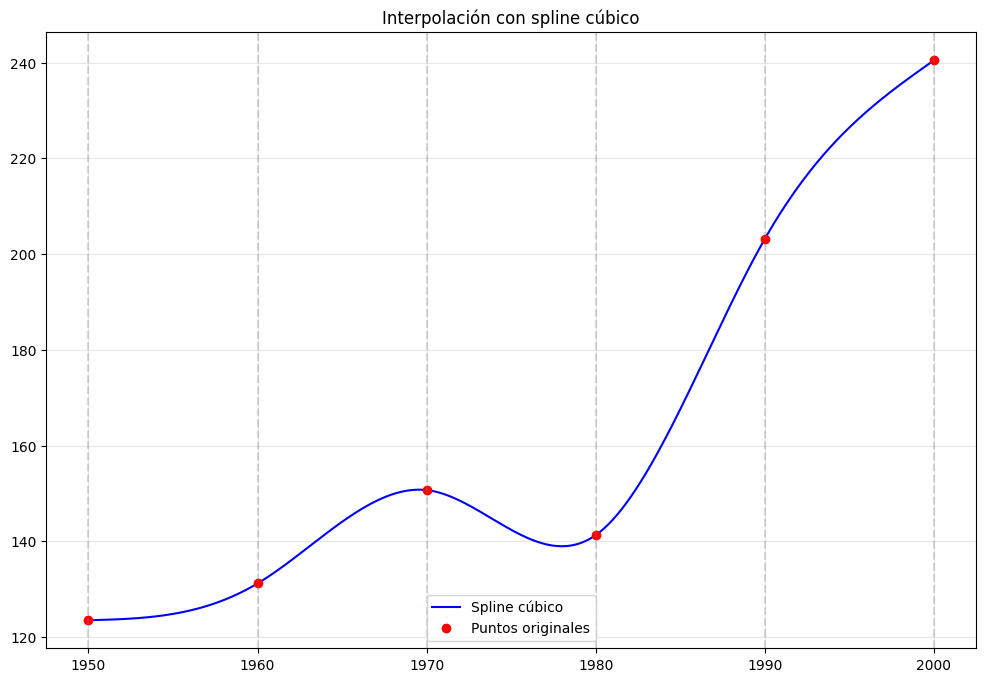

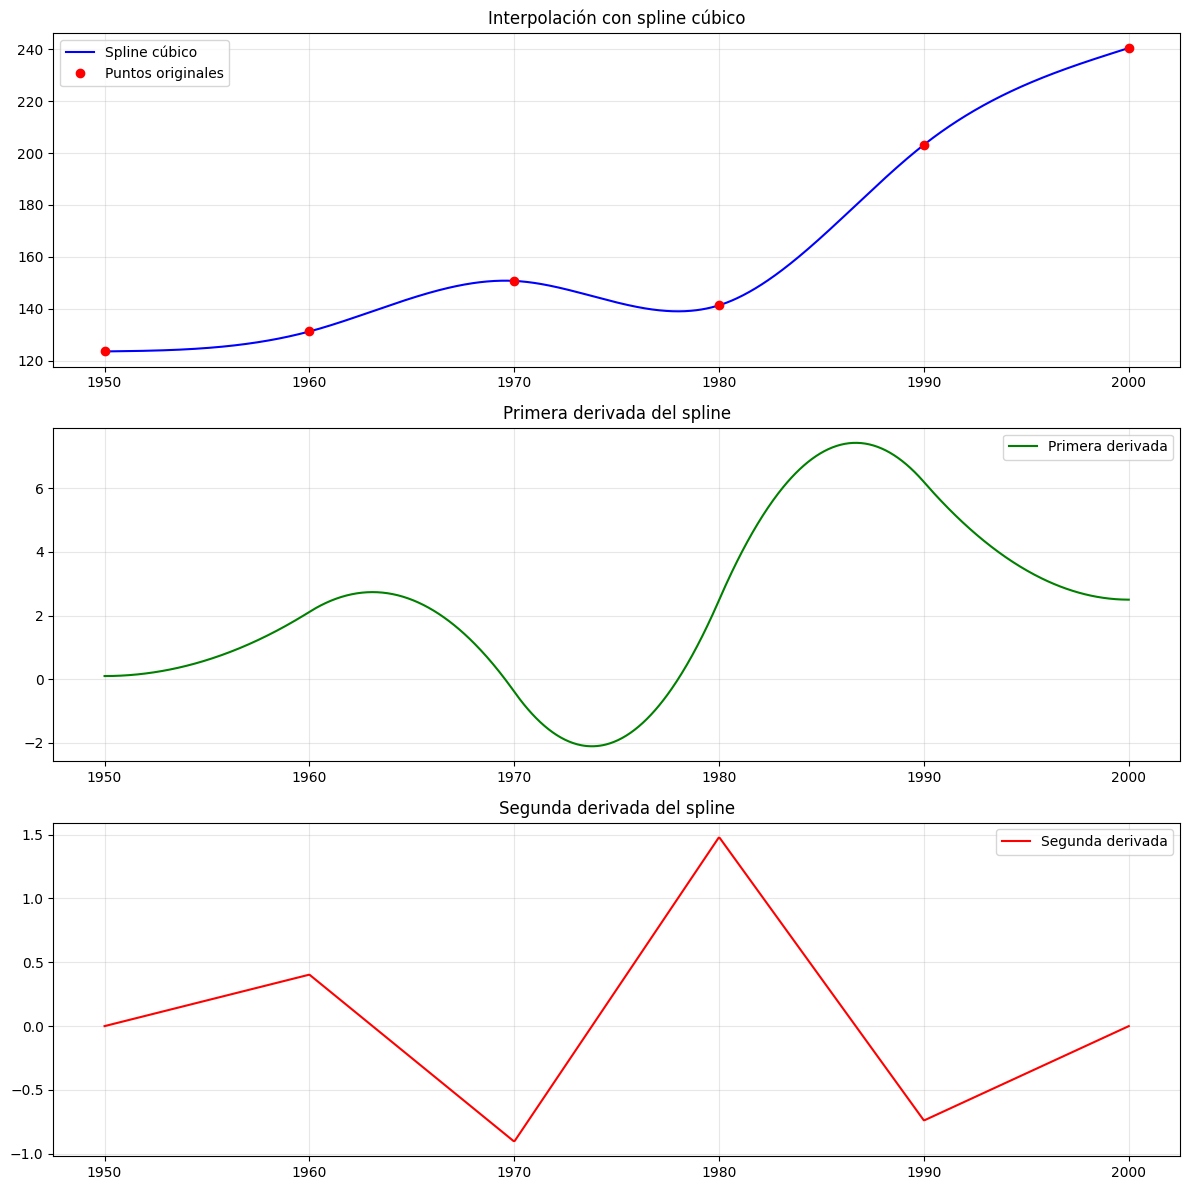

In [24]:
output_file = "spline_analysis_output.md"
if os.path.exists(output_file):
    os.remove(output_file)

def save_to_markdown(content):
    with open(output_file, "a") as f:
        f.write(content + "\n\n")

x = [1950, 1960, 1970, 1980, 1990, 2000]
y = [123.5, 131.2, 150.7, 141.3, 203.2, 240.5]

# Crear la instancia de spline
spline = CubicSpline()

# Configurar los puntos
spline.set_points(x, y)

# Guardar los datos iniciales
save_to_markdown("## Datos: Población de una ciudad a lo largo de los años")
save_to_markdown(f"Años: {x}")
save_to_markdown(f"Población (miles): {y}")
save_to_markdown("\n" + "=" * 80)

# Calcular los coeficientes mostrando el paso a paso
save_to_markdown("\n## CALCULANDO COEFICIENTES DE SPLINES CÚBICOS (PASO A PASO):")
coeffs = spline.calculate_coefficients(show_steps=True)

# Evaluar el spline en un punto específico
save_to_markdown("\n" + "=" * 80)
x_eval_point = 1965
y_interpolado = spline.evaluate(x_eval_point)
save_to_markdown(f"### Año {x_eval_point}: {y_interpolado:.2f} miles de habitantes")

# Mostrar los polinomios por tramos
save_to_markdown("\n" + "=" * 80)
save_to_markdown("## POLINOMIOS POR TRAMOS:")
save_to_markdown("=" * 80)
polynomials = []
for i in range(len(x) - 1):
    a = coeffs['a'][i]
    b = coeffs['b'][i]
    c = coeffs['c'][i]
    d = coeffs['d'][i]
    x_i = x[i]
    polynomial = f"Intervalo [{x[i]}, {x[i+1]}]:\n  S(x) = {a:.6f} + {b:.6f}(x-{x_i}) + {c:.6f}(x-{x_i})² + {d:.6f}(x-{x_i})³"
    polynomials.append(polynomial)
save_to_markdown("\n\n".join(polynomials))

# Visualizar el spline
save_to_markdown("\n" + "=" * 80)
save_to_markdown("## VISUALIZACIÓN DEL SPLINE:")
save_to_markdown("=" * 80)
save_to_markdown("Generando gráfico con la interpolación...")
fig = spline.plot_interpolation()
fig.savefig("spline_interpolation.png")
save_to_markdown("![Gráfico de la interpolación](spline_interpolation.png)")

# Mostrar también las derivadas
save_to_markdown("\nGenerando gráfico con la interpolación y sus derivadas...")
fig_der = spline.plot_interpolation(show_derivatives=True)
fig_der.savefig("spline_interpolation_derivatives.png")
save_to_markdown("![Gráfico de la interpolación y sus derivadas](spline_interpolation_derivatives.png)")